In [8]:
%matplotlib widget
import numpy as np
import json, os, glob
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit

from alvra_tools.load_data import *
from alvra_tools.channels import *
from alvra_tools.utils import *
from alvra_tools.XAS_functions import *
from alvra_tools.XAS_utils import *

import warnings
warnings.filterwarnings('ignore')

# Reduce data 

In [23]:
pgroup = 'p22250'

#runlist = np.arange(63, 73)
runlist = [288]

##############################################
from textwrap import wrap
from sfdata import SFScanInfo
jsonlist = []
for run in runlist:
    jsonfile = ''
    jsonfile = glob.glob('/sf/alvra/data/{}/raw/*{:04d}*/meta/scan.json'.format(pgroup, run))[0]
    #jsonfile = glob.glob('/sf/alvra/data/{}/res/*{:04d}*/meta/scan.json'.format(pgroup, run))[0]
    jsonlist.append(jsonfile)
print ("will reduce {} run(s): {}".format(len(jsonlist), runlist))
titlestring = pgroup + ' --- ' +str(runlist)
jsonlist

will reduce 1 run(s): [288]


['/sf/alvra/data/p22250/raw/run0288-XANES_125mM_1p52uJ_500fs/meta/scan.json']

In [24]:
channel_delay_motor = channel_delay_beckhoff
detector_XAS_1 = channel_diode_1
detector_XAS_2 = channel_diode_2
detector_Izero = channel_Izero110

dir2save = ''

TT = TT_PSEN126
saveflag = True

###########################################################
reducedir='/sf/alvra/data/{}/work/Reduced_data/{}'.format(pgroup, dir2save)

pump_1, unpump_1, pump_2, unpump_2, pump_1_raw, unpump_1_raw, pump_2_raw, unpump_2_raw, Izero_pump, Izero_unpump, Delays_stage, arrTimes, Delays_corr, energy, energypad, readbacks, corr1, corr2 = \
Reduce_scan_PP(reducedir, saveflag, jsonlist, TT, channel_delay_motor, detector_XAS_1, detector_XAS_2, detector_Izero)

#pump_1, unpump_1, pump_2, unpump_2, pump_1_raw, unpump_1_raw, pump_2_raw, unpump_2_raw, Izero_pump, Izero_unpump, Delays_stage, arrTimes, Delays_corr, energy, energypad, readbacks, corr1, corr2 = \
#Reduce_scan_PP_loop(reducedir, saveflag, jsonlist, TT, channel_delay_motor, detector_XAS_1, detector_XAS_2, detector_Izero)

#pump_1, pump_2, pump_1_raw, pump_2_raw, Izero_pump, Delays_stage, arrTimes, Delays_corr, energy, energypad, readbacks, corr1, corr2, lights, darks = \
#Reduce_scan_PP_noPair(reducedir, saveflag, jsonlist, TT, channel_delay_motor, detector_XAS_1, detector_XAS_2, detector_Izero)

/sf/alvra/data/p22250/raw/run0288-XANES_125mM_1p52uJ_500fs/meta/scan.json
Step 89 of 89: Processing acq0089

--------------------------------------------------------------------------------

SAR-CVME-TIFALL4:EvtSet           1001 / 1003 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
SARES11-CVME-EVR0:DUMMY_PV3_NBS    994 / 1003 -> 1% loss ▇▇▇▇▇▇▇▇▇
SARES11-GES1:PR1_CH1_VAL_GET      1001 / 1003 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
SARES11-GES1:PR1_CH2_VAL_GET      1001 / 1003 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
SARES11-SPEC125-M1.edge_amplitude 1001 / 1003 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
SARES11-SPEC125-M1.edge_position  1001 / 1003 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
SAROP11-PBPS110:INTENSITY         1001 / 1003 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
SLAAR11-L-BECKBS:PR1_CH4_VAL_GET  1001 / 1003 -> 0% loss ▇▇▇▇▇▇▇▇▇▇

over the whole data set: 992 / 1003 -> 1% loss
complete channels: 0 / 8 -> 100% incomplete

--------------------------------------------------------------------------------

FEL rep rate is 100.0 Hz
Laser rep rate is 50.0 Hz (delayed or dark)
Pump scheme is 1:1
Loa

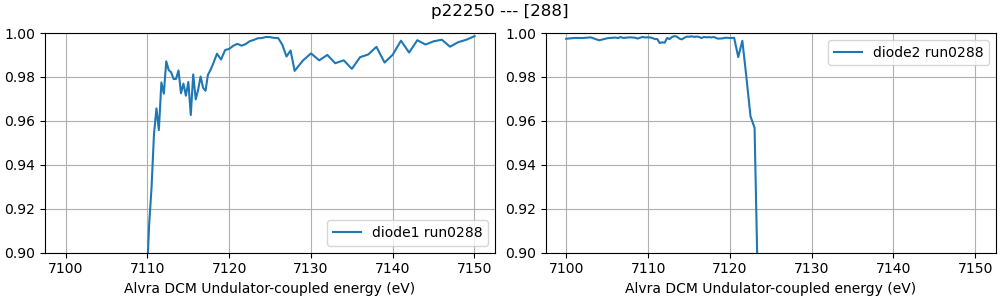

In [25]:
Plot_correlations_scan(pgroup, reducedir, runlist, path='raw', timescan=False, lowlim = 0.9)  #This plots ALL the runs of runlisT

Time delay axis rebinned with delay stage data
Time delay axis rebinned with delay stage data


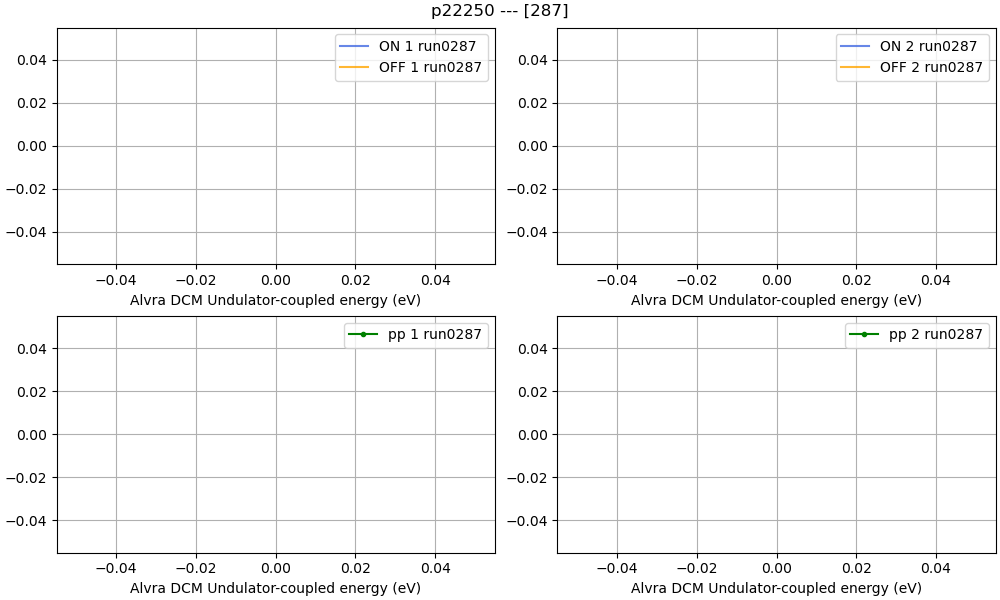

In [22]:
Plot_scan_2diodes(pgroup, reducedir, runlist, path='raw', timescan=True)  ## this plots only the LAST run of runlist